In [9]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pathlib import Path
import json

In [41]:
%matplotlib inline

In [3]:
! ls /home/ubuntu/data/

iWildCam_2019_CCT


In [5]:
PATH = Path("/home/ubuntu/data/iWildCam_2019_CCT/")

In [7]:
[print(i) for i in PATH.iterdir()]

/home/ubuntu/data/iWildCam_2019_CCT/iWildCam_2019_CCT_Bboxes.json
/home/ubuntu/data/iWildCam_2019_CCT/iWildCam_2019_CCT.json
/home/ubuntu/data/iWildCam_2019_CCT/iWildCam_2019_CCT_images


[None, None, None]

In [8]:
IMGPATH = PATH/"iWildCam_2019_CCT_images/"

In [10]:
with open(PATH/"iWildCam_2019_CCT.json") as json_file:  
    img_info = json.load(json_file)

In [11]:
img_info.keys()

dict_keys(['images', 'info', 'annotations', 'categories'])

In [34]:
len(img_info['images'])

196157

In [30]:
df = pd.read_csv("/home/ubuntu/data/kaggle/train.csv")

In [36]:
len(df) - len(img_info['images'])

142

Explore Kaggle data set

In [37]:
df.width.value_counts()

1024    196299
Name: width, dtype: int64

In [38]:
df.height.value_counts()

747    189960
768      4459
748      1880
Name: height, dtype: int64

In [39]:
df["category_id"].value_counts()

0     131457
19     14106
13      8623
11      7209
8       6938
1       6102
16      5975
17      4759
3       3398
18      3035
4       2210
14      1361
10      1093
22        33
Name: category_id, dtype: int64

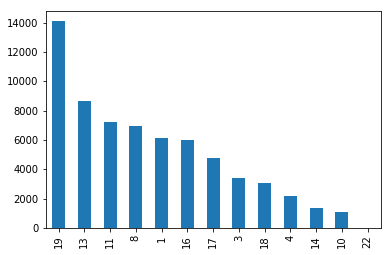

In [42]:
df["category_id"].value_counts()[1:].plot(kind="bar")

In [43]:
np.sum(df["category_id"] == 22)

33

In [44]:
classes = """empty, 0
deer, 1
moose, 2
squirrel, 3
rodent, 4
small_mammal, 5
elk, 6
pronghorn_antelope, 7
rabbit, 8
bighorn_sheep, 9
fox, 10
coyote, 11
black_bear, 12
raccoon, 13
skunk, 14
wolf, 15
bobcat, 16
cat, 17
dog, 18
opossum, 19
bison, 20
mountain_goat, 21
mountain_lion, 22""".split('\n')
classes = {int(i.split(', ')[1]): i.split(', ')[0] for i in classes}
df['classes'] = df['category_id'].apply(lambda x: classes[x])

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.96 µs


FileNotFoundError: [Errno 2] No such file or directory: '../input/iwildcam-2019-fgvc6/train_images/5a231150-23d2-11e8-a6a3-ec086b02610b.jpg'

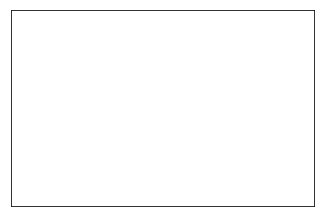

In [48]:
%time
fig = plt.figure(figsize=(25, 60))
classes = df.classes.unique()
imgs = []
labels = []
for i in classes:
    imgs.extend(np.random.choice(df.loc[df['classes'] == i, 'file_name'], 4))
    labels.extend([i,i,i,i])

for idx, img in enumerate(imgs):
    ax = fig.add_subplot(14, 4, idx + 1, xticks=[], yticks=[])
    im = Image.open("/home/ubuntu/kaggle/" + img)
    plt.imshow(im)
    ax.set_title(f'{labels[idx]}')